## Perkenalan

Nama Kelompok :
- Reynaldi Ananda Putra
- Desmonda Zefanya Namora Putri Manurung
- Reva Fahrian

Pada final project 4 ini menggunakan data yang bersumber dari kaggle yaitu Credit Card Dataset
Dataset ini terdiri dari 8950 baris dan 17 kolom.

Tujuan dari project ini adalah :

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

In [ ]:
# Liblary Utama
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# K-Means Clusterinng
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
# Model Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



## Data Loading

Dataset yang dipakai bernama Credit Card Dataset for Clustering. Dataset ini berisi tentang perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. File tersebut berada di tingkat pelanggan dengan 18 variabel perilaku. Dataset ini terdiri dari 8950 baris dan 17 kolom.

In [ ]:
# Membaca data dari file CSV
df = pd.read_csv("CC GENERAL.csv")

# Mengubah nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

# Menghapus kolom tertentu
df = df.drop("cust_id",axis=1)

# Menampilkan 10 baris pertama data
df.head(10)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
# Menampilkan record data terakhir
df.tail()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
8876,121.294493,0.750,385.26,385.26,0.00,169.554775,0.500,0.500,0.000,0.125,3,7,500.0,98.225317,113.944625,0.0,8
8877,55.147722,0.875,163.31,0.00,163.31,0.000000,0.875,0.000,0.750,0.000,0,7,1000.0,62.619008,109.580539,0.0,8
8878,869.328293,0.750,0.00,0.00,0.00,1153.925205,0.000,0.000,0.000,0.125,3,0,1200.0,150.755024,337.986933,0.0,8
8879,137.744895,1.000,441.00,0.00,441.00,0.000000,0.750,0.000,0.625,0.000,0,6,1000.0,169.249683,124.639905,0.0,8
8880,331.070135,0.750,81.20,81.20,0.00,419.341394,0.125,0.125,0.000,0.250,7,1,500.0,116.761487,205.065526,0.0,8


In [ ]:
# Melihat Jumlah dimensi dataset
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 8950
Number of Columns	: 17


Pada hasil tersebut dapat dilihat bahwa data tersebut memiliki jumlah baris sebesar 8950 dan jumlah kolom 17

In [ ]:
# Menampilkan daftar columns
df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

In [ ]:
# Menghitung nilai unik setiap kolom
df.nunique()

balance                             7434
balance_frequency                     30
purchases                           5218
oneoff_purchases                    3341
installments_purchases              3705
cash_advance                        3420
purchases_frequency                   41
oneoff_purchases_frequency            41
purchases_installments_frequency      41
cash_advance_frequency                30
cash_advance_trx                      24
purchases_trx                         89
credit_limit                         168
payments                            7307
minimum_payments                    7291
prc_full_payment                      47
tenure                                 5
dtype: int64

## Data Cleaning

In [ ]:
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
minimum_payments,float64,313,3.497207,8636,243.685673
credit_limit,float64,1,0.011173,205,5250.000000
balance,float64,0,0.000000,8871,553.901465
cash_advance_frequency,float64,0,0.000000,54,0.375000
prc_full_payment,float64,0,0.000000,47,0.125000
payments,float64,0,0.000000,8711,1398.406343
purchases_trx,int64,0,0.000000,173,16.000000
cash_advance_trx,int64,0,0.000000,65,43.000000
purchases_installments_frequency,float64,0,0.000000,47,0.750000
balance_frequency,float64,0,0.000000,43,0.545455


Dari output di atas dapat kita ketahui bahwa pada kolom minimum_payment memiliki nilai null 313 dan kolom credit_limit 1. maka data harus dibersihkan

In [ ]:
# Menghapus data kosong pada kolom credit limit
df.dropna(subset=["credit_limit"], inplace=True)

Karena pada kolom credit limit hanya terdapat 1 data kosong, maka kita lakukan penghapusan missing value tersebut

In [ ]:
# mengisi missing value dengan nilai mean
df = df.fillna(df.mean())

In [ ]:
#Menghapus baris yang terdapat missing value
df=df.dropna()
df.isnull().any()

balance                             False
balance_frequency                   False
purchases                           False
oneoff_purchases                    False
installments_purchases              False
cash_advance                        False
purchases_frequency                 False
oneoff_purchases_frequency          False
purchases_installments_frequency    False
cash_advance_frequency              False
cash_advance_trx                    False
purchases_trx                       False
credit_limit                        False
payments                            False
minimum_payments                    False
prc_full_payment                    False
tenure                              False
dtype: bool

Kolom pada data tersebut menunjukan sudah tidak mengandung nilai kosong yang ditandai "FALSE" atau bersih

In [ ]:
# melihat apakah ada data duplikat pada dataset
df.duplicated().sum()

0

Duplicated values yang ditampilkan adalah 0, maka berarti tidak ada duplicated value pada dataset tersebut.

In [ ]:
#melihat summary statistic
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
balance,7434.0,1269.831784,1517.952340,0.001214,120.946159,790.090769,1750.662783,7803.071972
balance_frequency,7434.0,0.889646,0.213397,0.181818,0.909091,1.000000,1.000000,1.000000
purchases,7434.0,753.123265,1025.441760,0.000000,46.687500,360.955000,1023.372500,7323.380000
oneoff_purchases,7434.0,431.275673,793.561465,0.000000,0.000000,35.000000,520.000000,5497.040000
installments_purchases,7434.0,322.112279,506.012658,0.000000,0.000000,88.915000,443.250000,3119.280000
cash_advance,7434.0,671.957249,1235.334487,0.000000,0.000000,0.000000,889.266455,7232.069823
purchases_frequency,7434.0,0.485746,0.396350,0.000000,0.083333,0.500000,0.916667,1.000000
oneoff_purchases_frequency,7434.0,0.192344,0.287619,0.000000,0.000000,0.083333,0.250000,1.000000
purchases_installments_frequency,7434.0,0.357495,0.392628,0.000000,0.000000,0.166667,0.750000,1.000000
cash_advance_frequency,7434.0,0.109677,0.158778,0.000000,0.000000,0.000000,0.166667,0.727273


Pada data tersebut menampilkan summary statistik dari masing-masing kolom dengan menunjukan jumlah dari count, mean, std, min,..., max

In [ ]:
# Menampilkan datset terbaru
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Seperti yang kita lihat bahwa pada data sudah tidak terdapat missing value dan data terduplikat, sehingga data credit card sudah dapat memasuki tahap eksplorasi data untuk mendapatkan insight dari data tersebut.

## Exploration Data Analysis (EDA)

In [ ]:
# Melihat korelasi dalam data
df.corr()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
balance,1.000000,0.349404,0.042223,0.078321,-0.037524,0.509312,-0.145517,0.029860,-0.139821,0.466543,0.435774,0.009701,0.400751,0.240485,0.610902,-0.377288,0.057468
balance_frequency,0.349404,1.000000,0.152808,0.113488,0.131446,0.085043,0.226480,0.178007,0.177131,0.186005,0.147070,0.210446,0.067577,0.061599,0.232204,-0.159424,0.104624
purchases,0.042223,0.152808,1.000000,0.875720,0.652988,-0.143448,0.555402,0.611340,0.412956,-0.197785,-0.158409,0.744789,0.298157,0.438270,0.038342,0.194430,0.072604
oneoff_purchases,0.078321,0.113488,0.875720,1.000000,0.206243,-0.089704,0.337738,0.692882,0.095937,-0.122729,-0.097218,0.552959,0.284639,0.401436,0.014227,0.102127,0.045241
installments_purchases,-0.037524,0.131446,0.652988,0.206243,1.000000,-0.150261,0.596025,0.152086,0.686644,-0.208456,-0.168699,0.642291,0.157688,0.258346,0.055252,0.233630,0.076047
cash_advance,0.509312,0.085043,-0.143448,-0.089704,-0.150261,1.000000,-0.287348,-0.123338,-0.238911,0.671845,0.694980,-0.173397,0.221555,0.345054,0.268975,-0.203739,-0.086218
purchases_frequency,-0.145517,0.226480,0.555402,0.337738,0.596025,-0.287348,1.000000,0.478305,0.855422,-0.354882,-0.293949,0.725113,0.118490,0.108915,-0.042378,0.307606,0.053851
oneoff_purchases_frequency,0.029860,0.178007,0.611340,0.692882,0.152086,-0.123338,0.478305,1.000000,0.078747,-0.139606,-0.116999,0.582221,0.274026,0.247869,-0.027150,0.129034,0.061977
purchases_installments_frequency,-0.139821,0.177131,0.412956,0.095937,0.686644,-0.238911,0.855422,0.078747,1.000000,-0.295972,-0.245211,0.643047,0.035968,0.066594,-0.021312,0.256354,0.054076
cash_advance_frequency,0.466543,0.186005,-0.197785,-0.122729,-0.208456,0.671845,-0.354882,-0.139606,-0.295972,1.000000,0.882863,-0.205582,0.056598,0.173954,0.246989,-0.272413,-0.078395


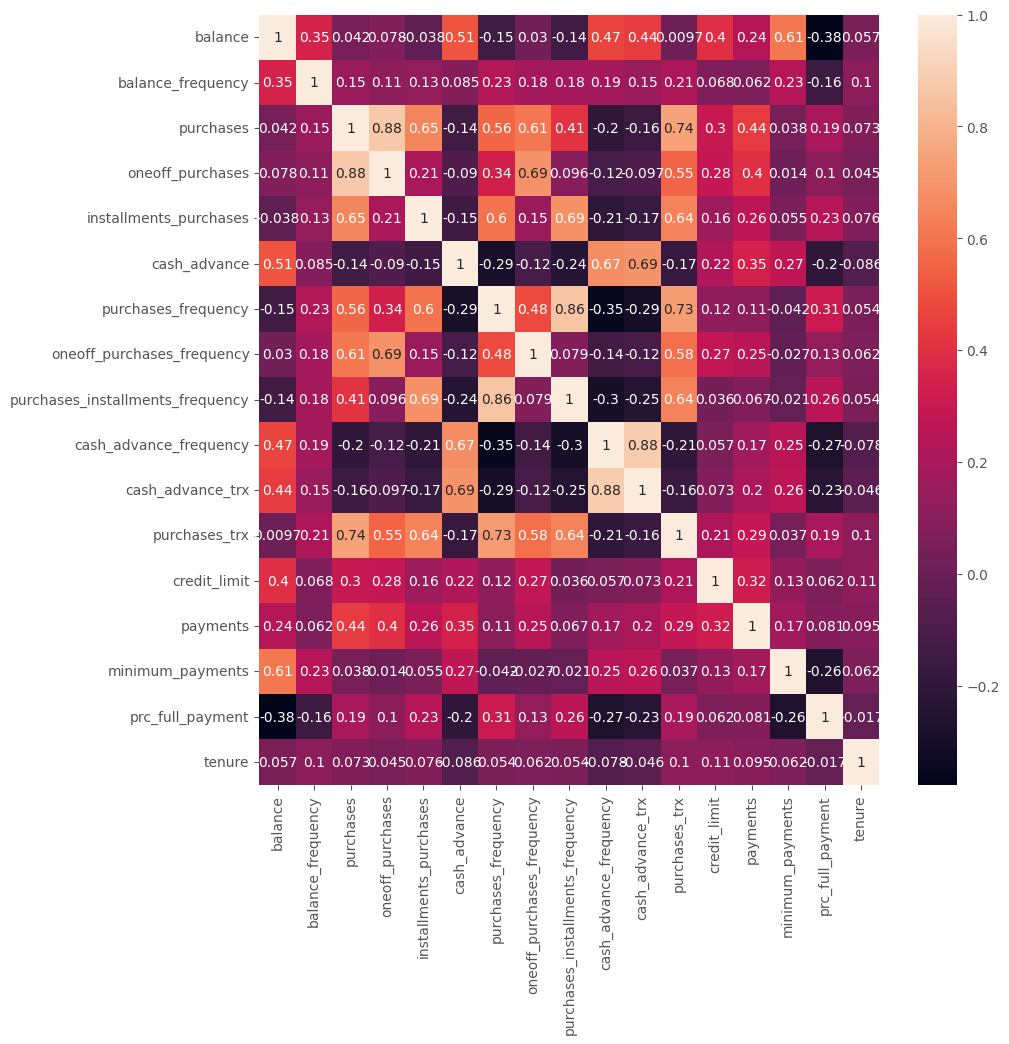

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

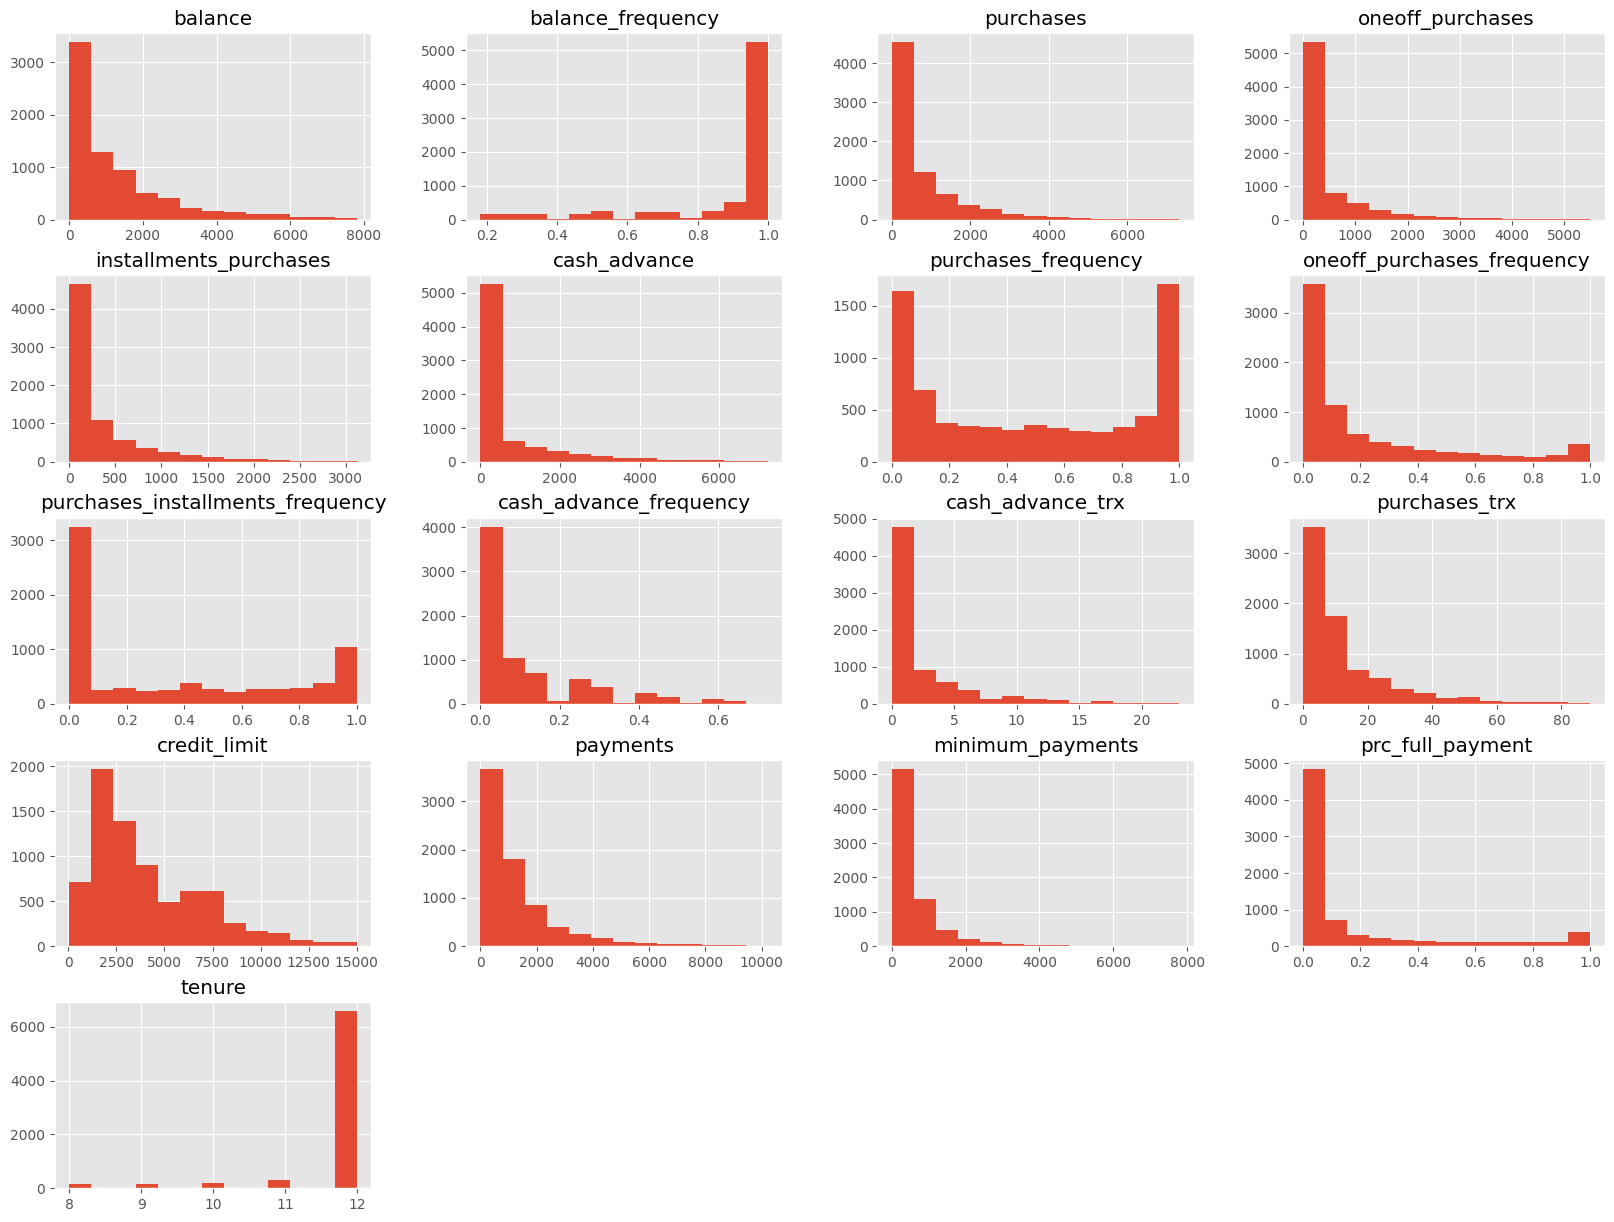

In [ ]:
df.hist(bins=13, figsize=(20,15), layout=(5,4));

Grafik histogram di atas merupakan visualisasi seluruh data numerik pada data credit card

In [ ]:
df["tenure"].value_counts()


tenure
12    6595
11     316
10     201
8      169
9      153
Name: count, dtype: int64

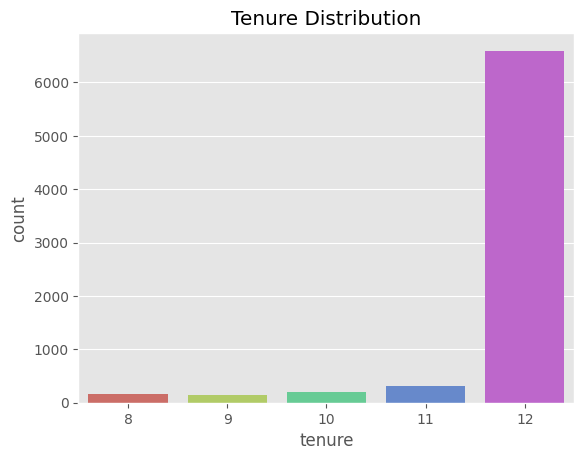

In [ ]:
sns.countplot(x="tenure", data=df, palette="hls")
plt.title("Tenure Distribution")
plt.show()

Dari grafik tersebut didapatkan bahwa lebih banyak pengguna yang memilih melakukan pembayaran layanan kartu kredit (tenure) selama 12 bulan dibandingkan pada bulan-bulan lainnya.

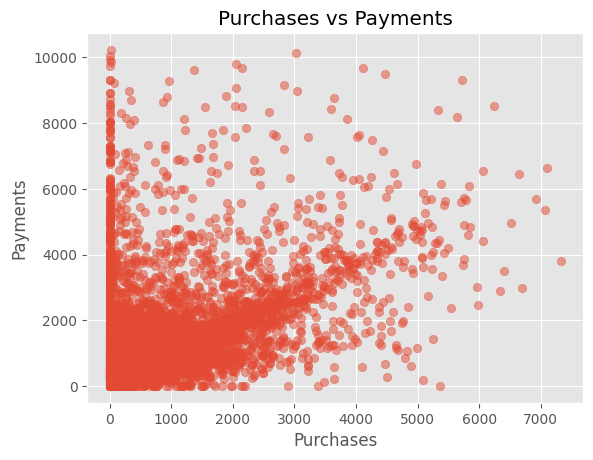

In [ ]:
# Mengambil kolom 'PURCHASES' dan 'PAYMENTS'
purchases = df['purchases']
payments = df['payments']

# Membuat scatter plot
plt.scatter(purchases, payments, alpha=0.5)

# Memberikan label pada sumbu x dan y
plt.xlabel('Purchases')
plt.ylabel('Payments')

# Menambahkan judul
plt.title('Purchases vs Payments')

# Menampilkan scatter plot
plt.show()

Dari scatter plot tersebut dapat dilihat bahwa dihasilkan korelasi positif antara purchases dan Payment

Text(0.5, 1.0, 'Korelasi Data Credit Limit Dengan Balance')

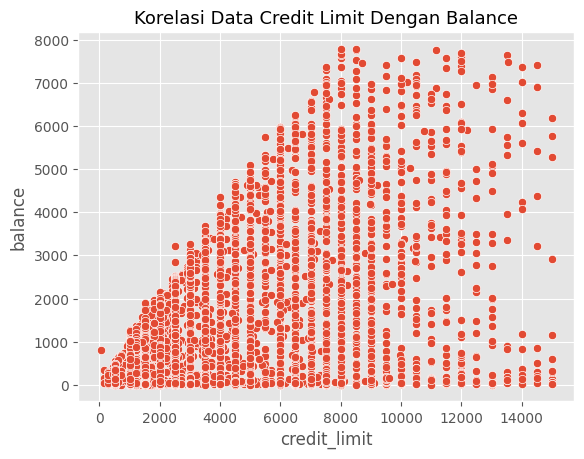

In [ ]:
sns.scatterplot(x="credit_limit", y="balance", data=df)
plt.title("Korelasi Data Credit Limit Dengan Balance", fontsize= 13)

Dari scatter plot tersebut dapat dilihat bahwa dihasilkan korelasi positif antara credit limit dan balance

Fitur-fitur saling berkorelasi satu sama lain bahkan beberapa fitur memiliki korelasi yang sangat tinggi yaitu mendekati 1 seperti fitur purchases dengan oneoff_purchases, cash_advance_frequency dengan cash_advance_trx, dan purchases_installment_frequency dengan purchases_frequency.

# Data Preprocessing

In [ ]:
# menampilkan statistik deskriptif dari kolom-kolom numerik pada dataset
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000,7434.000000
mean,1269.831784,0.889646,753.123265,431.275673,322.112279,671.957249,0.485746,0.192344,0.357495,0.109677,2.314501,12.057842,3999.597543,1297.565656,588.090784,0.154570,11.750740
std,1517.952340,0.213397,1025.441760,793.561465,506.012658,1235.334487,0.396350,0.287619,0.392628,0.158778,3.941055,15.120242,2935.900739,1436.498465,776.407375,0.290825,0.798485
min,0.001214,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,8.000000
25%,120.946159,0.909091,46.687500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.216308,167.947384,0.000000,12.000000
50%,790.090769,1.000000,360.955000,35.000000,88.915000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,797.938345,291.135341,0.000000,12.000000
75%,1750.662783,1.000000,1023.372500,520.000000,443.250000,889.266455,0.916667,0.250000,0.750000,0.166667,3.000000,16.000000,6000.000000,1626.296448,736.779962,0.166667,12.000000
max,7803.071972,1.000000,7323.380000,5497.040000,3119.280000,7232.069823,1.000000,1.000000,1.000000,0.727273,23.000000,89.000000,15000.000000,10226.601760,7781.671432,1.000000,12.000000


In [ ]:
# Standardize data
scaler = StandardScaler()
df_train = scaler.fit_transform(df.values)
df_train.shape

(7434, 17)

In [ ]:
# Statistics of scaled data
df = pd.DataFrame(df, columns=df.columns)
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Dilakukan normalisasi pada dataset yang digunakan agar nilai data menjadi seimbang, karena jika terdapat nilai yang terlalu besar akan memiliki dampak pada proses pengolahan data. Pada scaler di atas menggunakan MinMaxScaler yang berfungsi untuk mengubah data berada di rentang 0 sampai 1.

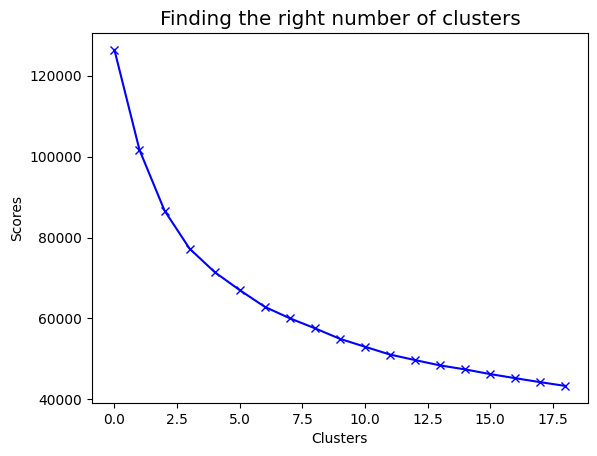

In [ ]:
#mencari jumlah cluster yang optimal menggunakan elbow method
scores_1 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_train)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

Dari plot tersebut dapat dilihat bahwa score tidak menurun secara linear sampai pada kluster ke-8 sehingga diputuskan untuk memilih jumlah kluster sebanyak 8

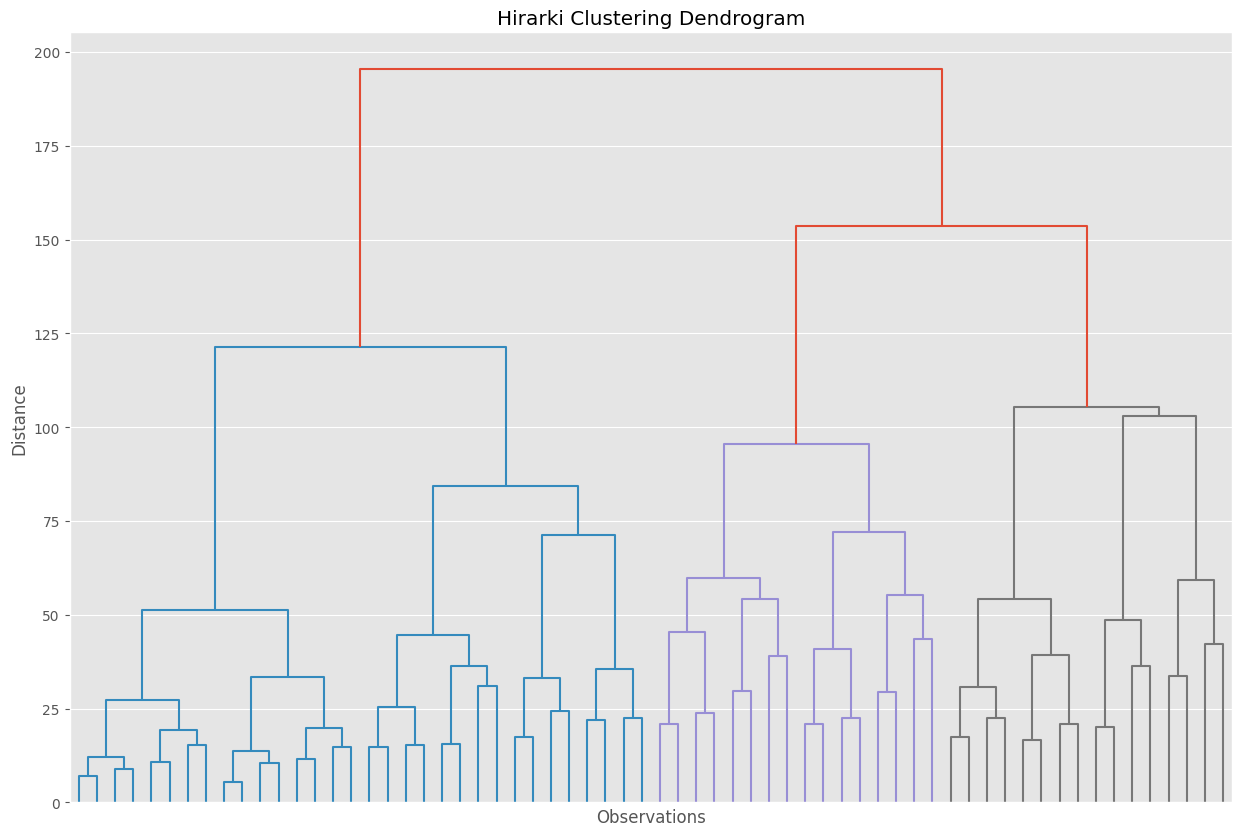

In [ ]:
# Dendrogram
HC = linkage(df_train, method="ward")
plt.figure(figsize=(15,10))
plt.title("Hirarki Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(HC, truncate_mode="level", p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

# Pendefinisan Model

K_MEANS

K-Means dalah algoritma unsupervised learning yang mengelompokkan dataset yang belum dilabel ke dalam kluster yang berbeda berdasarkan kesamaan tertentu

In [ ]:
x = df.values

In [ ]:
# Mendefinisikan model kmeans dengan jumlah cluster sebanyak 5
kmean = KMeans(n_clusters = 5,init ="k-means++", max_iter=300,random_state=35)
y_kmeans = kmean.fit_predict(x)

In [ ]:
y_kmeans

array([0, 1, 3, ..., 0, 0, 0])

In [ ]:
df_kmean= df.copy()
df_kmean['KMeansSegment']= kmean.labels_

In [ ]:
df_kmean= df.copy()
df_kmean['KMeansSegment']= kmean.labels_

In [ ]:
df_kmean['Labels'] = df_kmean['KMeansSegment'].map({0:'limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo',
                                                           1:'limit kredit rendah & Pengguna jarang memperbaharui isi saldo',
                                                           2:'limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo',
                                                           3:'limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo ',
                                                           4:'limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo'})
df_kmean.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,KMeansSegment,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,limit kredit pengguna paling rendah & Pengguna...
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,limit kredit rendah & Pengguna jarang memperba...
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,limit kredit pengguna pengguna tinggi & penggu...
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3,limit kredit pengguna pengguna tinggi & penggu...
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,limit kredit pengguna paling rendah & Pengguna...


#MODEL TRAINING

In [ ]:
# Mengurangi dimensi dengan membentuk variabel-variabel baru yang disebut Principal Components
# PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df_train)
pca_data = pd.DataFrame(data=components,
                        columns=["Component 1", "Component 2"])

In [ ]:
print(pca.explained_variance_ratio_)

print("Total informasi dari 2 Component= ", sum(pca.explained_variance_ratio_))

[0.28968147 0.20361759]
Total informasi dari 2 Component=  0.49329906344086893


In [ ]:
pca_data.head()

,Component 1,Component 2
0,-1.325627,-2.046613
1,-2.781084,3.311379
2,1.237435,0.544741
3,-0.606673,-0.007231
4,-1.448066,-1.469041


Kita dapat melihat detail data-nya dengan mengakses pca_data

Setelah mengurangi atribut menjadi 3 dimensi, kita akan melakukan pengelompokan dengan menggunakan elbow method Langkah-langkah yang dilakukan dalam Clustering

- Metode Elbow untuk menentukan jumlah cluster yang akan dibentuk
- Memeriksa cluster yang terbentuk melalui scatter plot

Berdasarkan visualisasi elbow method di atas, nilai K paling optimal adalah 5. Dengan begitu, jumlah cluster terbentuk sebanyak 5

In [ ]:
df_pca = pd.concat([pca_data,df_kmean.KMeansSegment], axis = 1)
df_pca.head(10)

,Component 1,Component 2,KMeansSegment
0,-1.325627,-2.046613,0.0
1,-2.781084,3.311379,1.0
2,1.237435,0.544741,3.0
3,-0.606673,-0.007231,3.0
4,-1.448066,-1.469041,0.0
5,0.893105,0.204669,0.0
6,0.822609,-0.898321,NaN
7,-0.043324,-0.543112,0.0
8,-0.020666,-0.635521,3.0
9,1.232943,-0.277710,4.0


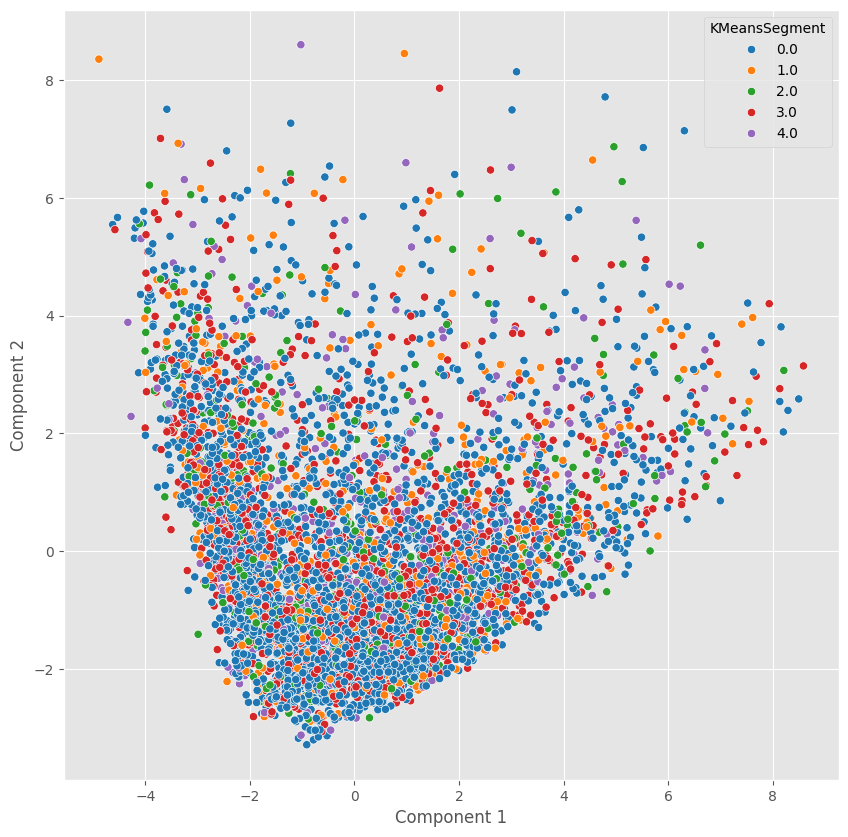

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="Component 1", y="Component 2", hue = "KMeansSegment", data = df_pca , palette='tab10')
plt.show()

Setelah melalui beberapa analisis dan teknik pemrosesan, data yang digunakan dapat dikelompokkan menjadi 5 clustering, dimana kelima cluster tersebut memiliki kriteria yang berbeda, yaitu:

- Cluster 0: limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo
- Cluster 1: limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo
- Cluster 2: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
- Cluster 3: limit kredit pengguna tinggi & pengguna sering memperbaharui isi saldo
- Cluster 4: limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo

# Evaluasi Model

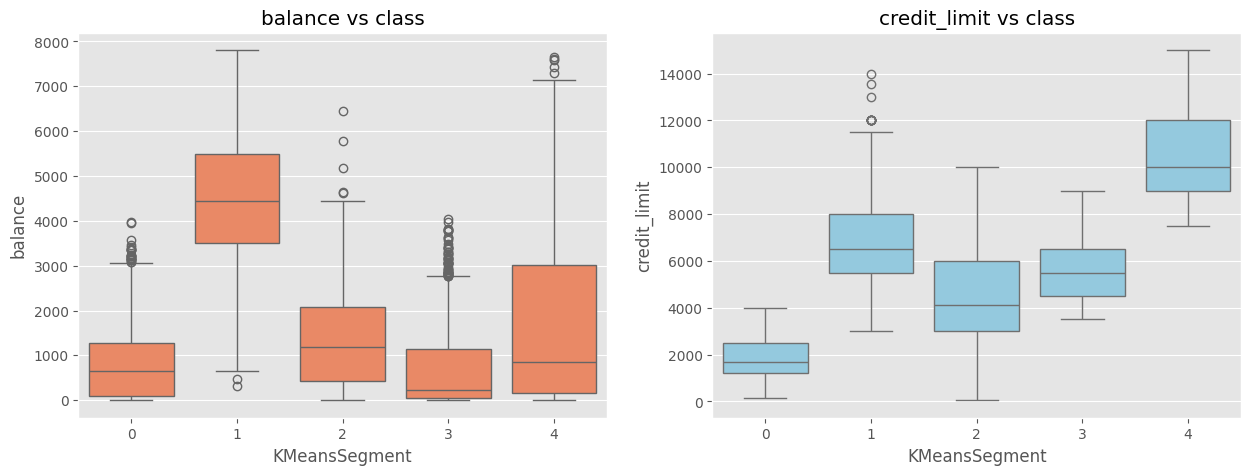

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = "KMeansSegment", y = "balance", data  = df_kmean, color = "coral");
plt.title("balance vs class")

plt.subplot(1,2,2)
sns.boxplot(x = "KMeansSegment", y = "credit_limit", data  = df_kmean, color = "skyblue");
plt.title("credit_limit vs class")

plt.show()

Perbandingan antara balance vs class dan credit_limit vs class, menghasilkan informasi bahwa semakin tinggi balance suatu class, maka credit_limit juga akan semakin tinggi juga. Sehingga dihasilkan kesimpulan sebagai berikut:

- Class 0: limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo
- Class 1: limit kredit pengguna rendah & Pengguna jarang memperbaharui isi saldo
- Class 2: limit kredit pengguna rata-rata & Pengguna cukup sering memperbaharui isi saldo
- Class 3: limit kredit pengguna tinggi & Pengguna sering memperbaharui isi saldo
- Class 4: limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo

# Model Inference

Selanjutnya akan kita coba model yang sudah kita buat dengan dataset lain selain data yang sudah tersedia. Disini kita menggunakan dataset diabetes untuk percobaan-nya.

In [ ]:
balance=40
balance_freq=0.2
purchases=95.05
oneoff_purchases=0
installments_purchases=90.5
cash_advance=0
purchases_freq=0.333
oneoff_purchases_freq=0.12
purchases_installments=0.5
cash_adv_freq=0
cash_adv_trx=0
purchase_trx=3
credit_limit=1000
payments=201
min_payments=135
prc_full_pay=0
tenure=10

feature=[balance,balance_freq,purchases, oneoff_purchases, installments_purchases,cash_advance,purchases_freq,
         oneoff_purchases_freq,purchases_installments,cash_adv_freq,cash_adv_trx,purchase_trx,credit_limit,payments,min_payments,
         prc_full_pay,tenure]

feature=scaler.transform([feature])

feature.reshape(17,)

print(feature)

predict=kmean.predict(feature)

if predict == 0:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : Cluster 0 (limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo)')
elif predict == 1:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : Cluster 1 (limit kredit rendah & Pengguna jarang memperbaharui isi saldo)')
elif predict == 2:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster : Cluster 2 (limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo)')
elif predict == 3:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster :  Cluster 3 (limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo)')
elif predict == 4:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster :  Cluster 4 (limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo)')

[[-0.8102458  -3.23196984 -0.64178928 -0.54350507 -0.45775111 -0.5439842
  -0.38540734 -0.25154395  0.36297543 -0.69080633 -0.5873191  -0.59909437
  -1.02176455 -0.76341148 -0.58361277 -0.53152321 -2.19272414]]
Berdasarkan analisa, pengguna masuk ke dalam cluster : Cluster 0 (limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo)


Penelitian ini fokus pada menerapkan algoritma Unsupervised Learning dengan menggunakan metode Principal Component Analysis (PCA) dan K-Means untuk menyelesaikan masalahnya. Dalam mencari jumlah clustering yang optimal, digunakan teknik ELBOW METHOD, yang menghasilkan jumlah Cluster optimal sebanyak 5.

Setelah melalui berbagai analisis dan proses pengolahan data, hasilnya menunjukkan bahwa data dapat dikelompokkan menjadi 5 cluster. Kelima cluster tersebut memiliki karakteristik yang berbeda, yakni:

- Cluster 0: limit kredit pengguna paling rendah & Pengguna sangat jarang memperbaharui isi saldo
- Cluster 1: limit kredit rendah & Pengguna jarang memperbaharui isi saldo
- Cluster 2: limit kredit pengguna rata-rata & pengguna cukup sering memperbaharui isi saldo
- Cluster 3: limit kredit pengguna pengguna tinggi & pengguna sering memperbaharui isi saldo
- Cluster 4: limit kredit pengguna paling tinggi & Pengguna sangat sering memperbaharui isi saldo